In [ ]:
# Mounting drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

#Reading files from drive
path_link = "/content/drive/MyDrive/users.dat"
users = pd.read_csv(path_link,delimiter='::')
users.columns

path_link = "/content/drive/MyDrive/movies.dat"
movies = pd.read_csv(path_link,delimiter='::')
movies.columns

path_link = "/content/drive/MyDrive/ratings.dat"
ratings = pd.read_csv(path_link,delimiter='::')
ratings.columns

<ipython-input-2-e2e27b77eb6f>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv(path_link,delimiter='::')
<ipython-input-2-e2e27b77eb6f>:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv(path_link,delimiter='::')
<ipython-input-2-e2e27b77eb6f>:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv(path_link,delimiter='::')


Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')

**Data Preprocessing**

In [ ]:
#Merging Movies and Ratings dataset on MovieID column
merged_ratings=ratings.merge(movies,on="MovieID")
merged_ratings.isnull().sum()
merged_ratings.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [ ]:
# Selecting users who have rated atleast 50 movies
x=merged_ratings.groupby('UserID').count()['Rating']>=50
filtered_user=x[x].index

filtered_ratings=merged_ratings[merged_ratings['UserID'].isin(filtered_user)]

final_ratings=filtered_ratings
final_ratings

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
#Creating pivot table(user item matrix)
user_item_matrix=final_ratings.pivot_table(index='UserID',columns='Title',values='Rating')
user_item_matrix

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj rlighetens kj tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6036,NaN,3.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

#Function to fill NaN using Linear Regression
def fill_nan_with_imputer_and_regression(matrix):
    matrix_copy = matrix.copy()
    # Initialize SimpleImputer to fill NaN values with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    pt_imputed = pd.DataFrame(imputer.fit_transform(matrix_copy), columns=matrix_copy.columns, index=matrix_copy.index)

    for movie in user_item_matrix.columns:
        # Identify rows (users) with missing values for the current movie
        missing_indices = user_item_matrix.index[user_item_matrix[movie].isna()]

        if len(missing_indices) > 0:
            # Identify rows (users) with available ratings for the current movie
            available_indices = user_item_matrix.index[~user_item_matrix[movie].isna()]

            # Prepare the training data
            X_train = pt_imputed.loc[available_indices].drop(columns=[movie])
            y_train = pt_imputed.loc[available_indices, movie]

            # Prepare the testing data
            X_test = pt_imputed.loc[missing_indices].drop(columns=[movie])

            # Train linear regression model
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Predict missing values
            predicted_values = model.predict(X_test)

            matrix_copy.loc[missing_indices, movie] = predicted_values

    return matrix_copy


# Call finction to replace NaN values with linear regression predictions after using imputer
filled_user_item_matrix = fill_nan_with_imputer_and_regression(user_item_matrix)
filled_user_item_matrix


Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj rlighetens kj tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,2.997322,3.518939,2.756839,2.700362,3.844716,2.0,2.657550,3.646116,2.942949,4.169006,...,3.547757,3.315223,3.600330,3.132870,3.387939,3.643969,3.179307,3.112474,2.290377,3.609507
2,3.107790,3.539458,2.741512,3.044150,3.887271,2.0,1.914028,3.782804,2.987301,4.687914,...,3.661297,3.119631,3.656720,3.093477,3.362394,3.633922,3.178515,3.114980,2.116787,3.420748
3,2.962730,3.180509,2.693937,3.015370,4.100002,2.0,2.596192,3.618558,2.831097,4.307443,...,3.535979,3.711385,3.632717,3.080924,3.396734,3.657424,3.992019,3.109133,2.369081,3.574772
5,3.005325,2.824790,2.473988,2.597523,3.706335,2.0,2.049285,3.355032,3.131025,4.138022,...,3.945982,3.300435,3.509787,2.693069,3.466162,3.650496,3.992449,3.049063,2.163349,3.302686
6,2.938986,3.081124,2.773886,2.706984,3.437662,2.0,3.359655,3.753398,3.101708,3.923557,...,3.479097,3.659871,3.614904,2.797106,3.376815,3.634115,3.449930,3.111205,2.459305,3.094837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.832379,3.139838,2.639310,2.783449,3.995555,2.0,4.043622,4.532708,1.000000,4.725127,...,3.905219,4.121079,3.432791,2.779677,3.428359,3.138926,4.616674,3.063910,2.090995,2.988442
6036,2.405976,3.000000,2.191522,2.499641,3.021847,2.0,2.000000,4.000000,2.040371,4.810366,...,3.686553,3.000000,3.612740,2.993808,3.413514,3.549022,3.885311,3.033227,2.110297,2.000000
6037,2.996641,3.392392,2.600322,2.928371,3.450219,2.0,2.642302,4.342822,3.211626,4.000000,...,3.501469,3.327776,3.502854,3.147692,3.413944,3.469107,3.117880,3.099678,2.230989,3.268615


In [ ]:
filled_user_item_matrix.to_csv('/content/drive/MyDrive/filled_pivot_table_SVD.csv')

In [ ]:
# Uploading filled user-item matrix
from google.colab import files
# files.download('/content/drive/MyDrive/filled_pivot_table_SVD.csv')
filled_user_item_matrix_loaded = pd.read_csv('/content/drive/MyDrive/filled_pivot_table_SVD.csv', index_col=0)

filled_user_item_matrix_loaded

,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj rlighetens kj tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,2.997322,3.518939,2.756839,2.700362,3.844716,2.0,2.657550,3.646116,2.942949,4.169006,...,3.547757,3.315223,3.600330,3.132870,3.387939,3.643969,3.179307,3.112474,2.290377,3.609507
2,3.107790,3.539458,2.741512,3.044150,3.887271,2.0,1.914028,3.782804,2.987301,4.687914,...,3.661297,3.119631,3.656720,3.093477,3.362394,3.633922,3.178515,3.114980,2.116787,3.420748
3,2.962730,3.180509,2.693937,3.015370,4.100002,2.0,2.596192,3.618558,2.831097,4.307443,...,3.535979,3.711385,3.632717,3.080924,3.396734,3.657424,3.992019,3.109133,2.369081,3.574772
5,3.005325,2.824790,2.473988,2.597523,3.706335,2.0,2.049285,3.355032,3.131025,4.138022,...,3.945982,3.300435,3.509787,2.693069,3.466162,3.650496,3.992449,3.049063,2.163349,3.302686
6,2.938986,3.081124,2.773886,2.706984,3.437662,2.0,3.359655,3.753398,3.101708,3.923557,...,3.479097,3.659871,3.614904,2.797106,3.376815,3.634115,3.449930,3.111205,2.459305,3.094837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.832379,3.139838,2.639310,2.783449,3.995555,2.0,4.043622,4.532708,1.000000,4.725127,...,3.905219,4.121079,3.432791,2.779677,3.428359,3.138926,4.616674,3.063910,2.090995,2.988442
6036,2.405976,3.000000,2.191522,2.499641,3.021847,2.0,2.000000,4.000000,2.040371,4.810366,...,3.686553,3.000000,3.612740,2.993808,3.413514,3.549022,3.885311,3.033227,2.110297,2.000000
6037,2.996641,3.392392,2.600322,2.928371,3.450219,2.0,2.642302,4.342822,3.211626,4.000000,...,3.501469,3.327776,3.502854,3.147692,3.413944,3.469107,3.117880,3.099678,2.230989,3.268615


**Singular Value Decomposition**

In [ ]:
#Function to draw the scree plot
def scree_plot(singular_values):
  # Calculate the explained variance ratio
  explained_variance_ratio = (singular_values * 2) / np.sum(singular_values * 2)

  plt.plot(np.arange(1, len(singular_values) + 1), explained_variance_ratio)
  plt.xlabel('Number of Components')
  plt.ylabel('Explained Variance Ratio')
  plt.title('Scree Plot')
  plt.grid(True)
  plt.show()

In [ ]:
def power_iteration(A, num_iterations=1000):
    n = A.shape[0]
    b = np.random.rand(n)

    for _ in range(num_iterations):
        b = A.dot(b)
        b = b / np.linalg.norm(b)

    return b

    #Function to perform SVD
def SVD_power_iteration(matrix, num_iterations=1000):
    A = matrix.to_numpy()
    AT = A.T
    AAT = A.dot(AT)

    # Power iteration for dominant singular vector of AAT
    u1 = power_iteration(AAT, num_iterations)

    # Obtain sigma1 and v1 using AAT
    sigma1 = np.linalg.norm(AAT.dot(u1))
    v1 = AAT.dot(u1) / sigma1

    # Power iteration for dominant singular vector of ATA
    v1 = power_iteration(A.T.dot(A), num_iterations)

    # Obtain sigma1 and u1 using ATA
    sigma1 = np.linalg.norm(A.T.dot(A).dot(v1))
    u1 = A.T.dot(A).dot(v1) / sigma1


    # Construct U, S, and V
    U = u1.reshape(-1, 1)
    S = np.array([sigma1])
    V = v1.reshape(-1, 1)

    return U.real, S.real, V.real


In [ ]:
#Function to reduce dimensionality of decomposed matrices
def reducedSVD(U, S, Vt, k):
  if(k == 0):
    return U, S, Vt

  num_latent_factors = min(k, S.shape[0])

  # Retaining only the top 'num_latent_factors' singular values and corresponding columns in U and rows in Vt
  U_latent = U[:, :num_latent_factors]
  Sigma_latent = np.diag(S[:num_latent_factors])
  Vt_latent = Vt[:num_latent_factors, :]

  return U_latent, Sigma_latent, Vt_latent

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


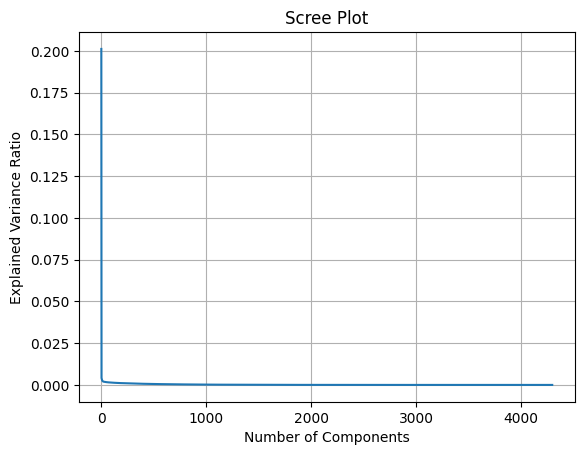

In [ ]:
U, Sigma, VT = SVD_power_iteration(filled_user_item_matrix_loaded)

In [ ]:
U_reduced, Sigma_reduced, Vt_reduced = reducedSVD(U, Sigma, VT, 10)

**K-means**

In [ ]:
import math

# Function to initialize cluster centroids using naive-sharding technique
def naive_sharding_initialization(Users, k):
    n = Users.shape[1]
    m = Users.shape[0]
    centroids = np.zeros((k, n))

    # Sum all elements of each row, and add as column to original dataset
    row_sums = np.sum(Users, axis=1)
    newUsers = np.column_stack((row_sums, Users))
    newUsers = newUsers[newUsers[:, 0].argsort()]

    step = math.floor(m / k)

    # Divide matrix rows equally by k-1
    # Sum columns of shards and get the mean these means are the initial centroids
    for j in range(k):
        if j == k-1:
            start_index = j * step
            centroids[j, :] = np.mean(newUsers[start_index:, 1:], axis=0)
        else:
            start_index = j * step
            end_index = (j + 1) * step
            centroids[j, :] = np.mean(newUsers[start_index:end_index, 1:], axis=0)

    return centroids

In [ ]:
# Function to  perform k-means clustering
def kmeans(Users, k, init='random'):
    if init == 'random' :
      centroids = Users[np.random.choice(Users.shape[0], k, replace=False)]
    elif init == 'naive_shard':
      centroids = naive_sharding_initialization(Users, k)

    diff = 1
    cluster = np.zeros(Users.shape[0])
    while diff:
      # Iterate through each data point
      for i, row in enumerate(Users):
          mn_dist = float('inf')

          # Calculate distance of the point from all centroids
          for idx, centroid in enumerate(centroids):
              d = np.linalg.norm(centroid - row)
              # store closest centroid
              if mn_dist > d:
                mn_dist = d
                cluster[i] = idx
      new_centroids = pd.DataFrame(Users).groupby(by=cluster).mean().values

      # if centroids are same then make diff 0
      if np.allclose(centroids, new_centroids):
          diff = 0
      else:
          centroids = new_centroids

    return centroids, cluster

#Function to calculate Within cluster sum of square(WCSS)
def calculate_cost(X, centroids, cluster):
  wcss = 0
  for cluster_id in np.unique(cluster):
      cluster_id = int(cluster_id)
      cluster_points = X[cluster == cluster_id]
      squared_distances = np.sum((cluster_points - centroids[cluster_id])**2, axis=1)
      wcss += np.sum(squared_distances)
  return wcss

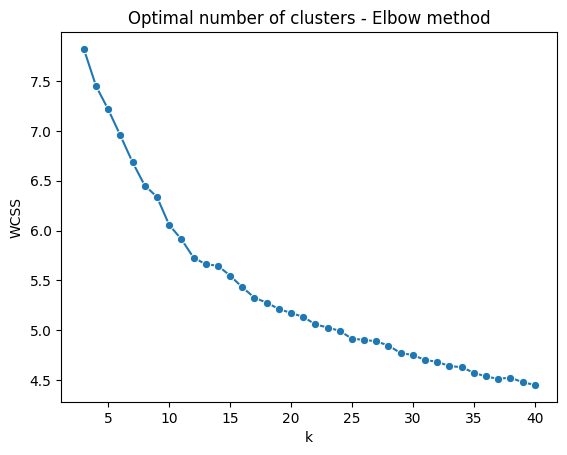

In [ ]:
# Using elbow method to determine optimal number of clusters
import seaborn as sns
cost_list = []
min_clusters = 3
max_clusters = 40
for k in range(min_clusters, max_clusters+1):
    centroids, cluster = kmeans(U_reduced, k, 'naive_shard')
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(U_reduced, centroids, cluster)
    cost_list.append(cost)

sns.lineplot(x=range(min_clusters,max_clusters+1), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal number of clusters - Elbow method')
plt.show()

Optimal number of clusters: 29


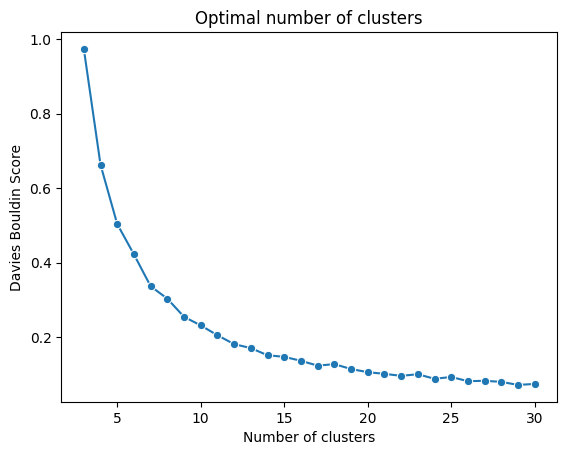

In [ ]:
# Determine optimal clusters using Davies-Bouldin index
from scipy.spatial.distance import pdist, euclidean
import matplotlib.pyplot as plt
def det_opt_clusters():
  min_clusters = 3
  max_clusters = 30

  # Calculate Davies-Bouldin index for different cluster numbers
  davies_bouldin_scores = []
  for n_clusters in range(min_clusters, max_clusters + 1):
      # Apply k-means clustering
      centroids, cluster_labels = kmeans(U_reduced, n_clusters, 'naive_shard')

      cluster_k = [U_reduced[cluster_labels == k] for k in range(n_clusters)]

      # Calculate cluster scatter (intra-cluster similarity)
      variances = [np.mean([euclidean(p, centroids[i]) for p in k]) for i, k in enumerate(cluster_k)]
      db = []

      # Calculate Davies-Bouldin index
      for i in range(n_clusters):
          for j in range(n_clusters):
              if j != i:
                  db.append((variances[i] + variances[j]) / euclidean(centroids[i], centroids[j]))

      davies_bouldin_scores.append(np.max(db) / n_clusters)


  # Plot the line graph
  sns.lineplot(x=range(min_clusters,max_clusters+1), y=davies_bouldin_scores, marker='o')

  plt.xlabel('Number of clusters')
  plt.ylabel('Davies Bouldin Score')
  plt.title('Optimal number of clusters - Davies Bouldin Index')
  # Show the plot
  plt.show()

det_opt_clusters()


In [ ]:
# Perform K-means
optimal_clusters = 13
centroids, cluster_labels = kmeans(U_reduced, optimal_clusters, 'naive_shard')

print("Cluster Labels:", cluster_labels)
print("Loss Value:", calculate_cost(U_reduced, centroids, cluster_labels))

Cluster Labels: [ 3.  3.  8. ...  8.  3. 10.]
Loss Value: 6.075632394483951


In [ ]:
#Convert cluster centroids to the same dimension as that of the user-item matrix
reduced_matrix = np.dot(np.dot(U_reduced, Sigma_reduced), Vt_reduced)
all_columns = user_item_matrix.columns
movie_list = all_columns.tolist()

reduced_data = pd.DataFrame(reduced_matrix, columns = movie_list)
reduced_data['Cluster'] = cluster_labels
cluster_means = reduced_data.groupby('Cluster').mean()

cluster_means

,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj rlighetens kj tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Cluster,,,,,,,,,,,,,,,,,,,,,
0.0,2.589117,2.892490,2.278414,2.290513,3.321554,1.989310,2.680025,3.185192,2.232495,4.062633,...,3.528076,2.850954,3.427896,2.836750,3.345305,3.325707,3.392043,2.980146,2.002182,2.759308
1.0,3.160438,3.404036,2.840241,3.116584,4.109385,1.997495,3.437019,3.701617,3.054957,4.412893,...,3.596423,3.599662,3.712039,2.996472,3.410568,3.714454,3.812265,3.153774,2.185881,3.172544
2.0,3.036651,3.309357,2.833247,2.781168,3.815739,2.000913,3.549737,3.865892,3.233583,4.353730,...,3.621338,3.450793,3.598335,2.874538,3.407379,3.585548,3.648486,3.105080,2.361349,3.058143
3.0,2.992020,3.342222,2.719938,2.857765,3.848765,1.999936,3.362903,3.634582,2.962771,4.307776,...,3.594782,3.364320,3.605015,3.134947,3.393533,3.598643,3.647400,3.109731,2.215136,3.251818
4.0,3.026889,3.314602,2.689833,2.820274,3.968119,2.002897,3.354733,3.486783,2.872820,4.282192,...,3.571284,3.365695,3.589019,3.069978,3.390045,3.593843,3.401468,3.106686,2.171526,3.053175
5.0,3.031572,3.247175,2.771610,3.053512,3.959548,1.999554,3.371036,3.527035,2.767672,4.241411,...,3.719766,3.511355,3.583608,3.127446,3.401439,3.602236,3.796002,3.106894,2.161508,3.316921
6.0,3.033693,3.253183,2.624643,2.824247,3.611724,1.999696,3.435021,3.616888,3.175317,4.032889,...,3.534686,3.364151,3.553993,3.042989,3.378507,3.512344,3.411015,3.099234,2.339819,3.179732
7.0,2.968865,3.550742,2.840973,2.916265,3.939312,1.997786,3.435300,3.824689,3.085053,4.482763,...,3.653389,3.385368,3.629152,3.343257,3.403618,3.625431,3.907506,3.122526,2.255505,3.511909
8.0,3.002808,3.246594,2.729254,2.806698,3.756928,2.000797,3.372659,3.713180,3.024065,4.252928,...,3.552139,3.372865,3.590172,3.113951,3.393850,3.585154,3.544714,3.102794,2.324664,3.256486


In [ ]:
#Save centroids to drive
import pickle
centroids_file = '/content/drive/MyDrive/cluster_centroids_nan_with_regression.pkl'
centroids_lables_file = '/content/drive/MyDrive/cluster_centroid_labels_nan_with_regression.pkl'

with open(centroids_file, 'wb') as f:
    pickle.dump(cluster_means, f)

with open(centroids_lables_file, 'wb') as f:
  pickle.dump(cluster_labels, f)

print(f"Cluster centroids and lables saved")

Cluster centroids and lables saved


In [ ]:
#Upload centroids from drive
import pickle
centroids_file = '/content/drive/MyDrive/cluster_centroids_nan_with_regression.pkl'
centroids_lables_file = '/content/drive/MyDrive/cluster_centroid_labels_nan_with_regression.pkl'

# Load cluster centroids from pickle file
with open(centroids_file, 'rb') as f:
    cluster_centroids = pickle.load(f)

# Load cluster labels from pickle file
with open(centroids_lables_file, 'rb') as f:
    cluster_labels = pickle.load(f)

In [ ]:
# Function to determine clsuter of a new user
def determine_user_cluster(new_user_ratings, centroids):
  distances = np.linalg.norm(new_user_ratings - centroids, axis=1)

  # Determine the cluster label with the least distance
  cluster_label = np.argmin(distances)

  return cluster_label

In [ ]:
def recommend_top_movies(new_user_ratings, centroids, cluster_labels, movies, n=5):
  # Determine the cluster to which the new user belongs
  new_user_cluster = determine_user_cluster(new_user_ratings, centroids)

  print('Cluster of the new user: ', new_user_cluster + 1)
  cluster_indices = np.where(cluster_labels == new_user_cluster)[0]

  # Retrieve the ratings of users in the same cluster as the new user
  cluster_users_ratings = user_item_matrix.iloc[cluster_indices]

  # Calculate the average ratings for each movie in the cluster
  avg_ratings = cluster_users_ratings.mean(axis=1)

  # Get the indices of top n movies with the highest average ratings
  top_movie_indices = avg_ratings.argsort()[-n:][::-1]
  top_movies = movies.iloc[top_movie_indices]

  top_movies.loc[:, 'Rating'] = avg_ratings.iloc[top_movie_indices].values
  return top_movies

In [ ]:
# Recommending movies for a new user who just entered
movie_names = ['Heat (1995)', 'Silence of the Lambs, The (1991)', 'Toy Story (1995)', 'Seven (Se7en) (1995)', 'Home Alone (1990)']
user_ratings = [5, 1, 1, 5, 1]

movie_id_loc = movies.loc[movies['Title'].isin(movie_names), 'MovieID'].values
new_user_ratings = pd.DataFrame({'UserID': 6041, 'MovieID': movie_id_loc, 'Rating': user_ratings, 'Title': movie_names})
new_final_ratings = pd.concat([final_ratings, new_user_ratings], ignore_index=True)
# new_final_ratings

In [ ]:
#Create a new user-item matrix to get the row(vector) of the new user
new_user_item_matrix = new_final_ratings.pivot_table(index='UserID', columns='Title', values='Rating')
new_user_item_matrix.fillna(user_item_matrix.mean(),inplace=True)
user_row = new_user_item_matrix.iloc[-1, :]
user_row

Title
$1,000,000 Duck (1971)                        3.028571
'Night Mother (1986)                          3.367647
'Til There Was You (1997)                     2.708333
'burbs, The (1989)                            2.886207
...And Justice for All (1979)                 3.682796
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.760943
Zero Kelvin (Kj rlighetens kj tere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.619048
eXistenZ (1999)                               3.251295
Name: 6041, Length: 3689, dtype: float64

In [ ]:
def display_popular_movies_in_clusters(user_item_matrix, cluster_labels, n_top_movies=5):
  print('Top rated movies in each user cluster: ')
  # Add the cluster labels to the user-item matrix
  user_item_matrix['Cluster'] = cluster_labels

  # Group the data by cluster and calculate the average rating for each movie in each cluster
  cluster_movie_ratings = user_item_matrix.groupby(['Cluster']).mean()

  for index, row in cluster_movie_ratings.iterrows():
    print('Cluster ', int(index+1))
    top_indices = row.nlargest(n_top_movies).index

    for col in top_indices:
        print("Movie:", col, "| Rating:", row[col])
    print("\n")

display_popular_movies_in_clusters(user_item_matrix, cluster_labels, n_top_movies=5)

Top rated movies in each user cluster: 
Cluster  1
Movie: Black Cat, White Cat (Crna macka, beli macor) (1998) | Rating: 5.0
Movie: For All Mankind (1989) | Rating: 5.0
Movie: Girl on the Bridge, The (La Fille sur le Pont) (1999) | Rating: 5.0
Movie: Harmonists, The (1997) | Rating: 5.0
Movie: Rich and Strange (1932) | Rating: 5.0


Cluster  2
Movie: 187 (1997) | Rating: 5.0
Movie: Affair of Love, An (Une Liaison Pornographique) (1999) | Rating: 5.0
Movie: All About Eve (1950) | Rating: 5.0
Movie: Aparajito (1956) | Rating: 5.0
Movie: Artemisia (1997) | Rating: 5.0


Cluster  3
Movie: After Life (1998) | Rating: 5.0
Movie: Artemisia (1997) | Rating: 5.0
Movie: Better Living Through Circuitry (1999) | Rating: 5.0
Movie: Bitter Sugar (Azucar Amargo) (1996) | Rating: 5.0
Movie: Careful (1992) | Rating: 5.0


Cluster  4
Movie: Actor's Revenge, An (Yukinojo Henge) (1963) | Rating: 5.0
Movie: Adventures of Elmo in Grouchland, The (1999) | Rating: 5.0
Movie: Among Giants (1998) | Rating: 5.0


In [ ]:
recommended_movies = recommend_top_movies(new_user_ratings=user_row, centroids=cluster_centroids, cluster_labels=cluster_labels, movies=movies)
recommended_movies

Cluster of the new user:  4


<ipython-input-165-89d94b28d677>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_movies.loc[:, 'Rating'] = avg_ratings.iloc[top_movie_indices].values


,MovieID,Title,Genres,Rating
343,347,Bitter Moon (1992),Drama,4.646154
116,118,If Lucy Fell (1996),Comedy|Romance,4.625000
641,647,Courage Under Fire (1996),Drama|War,4.580645
543,547,Surviving the Game (1994),Action|Adventure|Thriller,4.517241
515,519,Robocop 3 (1993),Sci-Fi|Thriller,4.513889


In [ ]:
# Function to calculate Jaccard similarity between two sets
def jaccard_similarity(set1, set2):
  intersection = len(set1.intersection(set2))
  union = len(set1.union(set2))
  return intersection / union if union != 0 else 0

In [ ]:
# Find the genres of the movies
rated_movie_genres = []
recommended_movie_genres = []

# Iterate over rated movies
for movie in movie_names:
    movie_row = movies[movies['Title'] == movie]
    # Extract genres of the rated movie and add to the list
    if not movie_row.empty:
        rated_movie_genres.extend(movie_row['Genres'].iloc[0].split('|'))

# Iterate over recommended movies
for movie in recommended_movies.iterrows():
    recommended_movie_genres.extend(movie[1][2].split('|'))

# Remove duplicate genres
rated_movie_genres = set(rated_movie_genres)
recommended_movie_genres = set(recommended_movie_genres)

In [ ]:
print('Genres of the movies rated by the user: ')
print(rated_movie_genres)
print('Genres of the movies recommended to the user: ')
print(recommended_movie_genres)
print('Accuracy: ', jaccard_similarity(rated_movie_genres, recommended_movie_genres))

Genres of the movies rated by the user: 
{'Action', 'Drama', "Children's", 'Thriller', 'Crime', 'Comedy', 'Animation'}
Genres of the movies recommended to the user: 
{'Drama', 'Action', 'War', 'Thriller', 'Sci-Fi', 'Romance', 'Adventure', 'Comedy'}
Accuracy:  0.36363636363636365
